### **Note** : Data is uploaded in kaggle kernel


## **Importing required libraries (Dependencies)**

In [6]:
import os
import cv2
import random 
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

## **Listing out the folders of training and testing images**

In [2]:
print(os.listdir("../input/state-farm-distracted-driver-detection/imgs"))

['test', 'train']


## **Creating varibles having path of training and testing directories**

In [3]:
training_dir = '../input/state-farm-distracted-driver-detection/imgs/train'
testing_dir = '../input/state-farm-distracted-driver-detection/imgs/test'

## **Dictionary with classes and habits**

In [4]:
class_dict = {'classes': ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],
              'habits' : ['safe driving','texting - right',
                          'talking on the phone - right','texting - left',
                          'talking on the phone - left','operating the radio',
                          'drinking','reaching behind','hair and makeup','talking to passenger']}

## **Preparing training data :**

In [5]:
# Creating empty list to append the training data
training_data = []

## **Creating the list of training data with image and its class**

In [6]:
def create_training_data():

    # Creating the path for each in category as well as image 
    # Reading each image in gray scale and resizing it to 240 x 240
    # Appending the resized image and its class in list (img_100026.jpg,'c0')
    # Returning the len of training data
    
    for category in class_dict['classes'] :
        path = os.path.join(training_dir,category)
        class_idx = class_dict['classes'].index(category)
        
        for image in os.listdir(path):
            image_path = os.path.join(path,image)
            img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img,(240,240))
            training_data.append([resized_img,class_idx])
    return len(training_data)

In [7]:
create_training_data()

22424

In [8]:
# print(training_data)

## **Preparing the testing data :**

In [9]:
# Creating empty list to append the testing data
testing_data = []

## **Creating the list of testing data with image and resized image**

In [10]:
def create_testing_data():
    
    # Creating the path for each image
    # Reading each image in gray scale and resizing it to 240 x 240
    # Appending the image and resized image 
    # Returning the len of testing data
    
    for image in os.listdir(testing_dir):
        image_path = os.path.join(testing_dir,image)
        img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img,(240,240))
        testing_data.append([image,resized_img])
    return len(testing_data)

In [11]:
create_testing_data()

79726

In [12]:
t1 = np.array(testing_data)
t1.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(79726, 2)

## **Shuffling the training data randomly**

In [13]:
training_data = random.sample(training_data, len(training_data))

In [14]:
# Creating two list one with features and other with labels
x = []
labels = []
for features, label in training_data:
    x.append(features)
    labels.append(label)

## **One-hot Encoding**

In [15]:
# E.g. --> if class 0 is predicted then y will be [1,0,0,0,0,0,0,0,0,0]

y = np_utils.to_categorical(labels,num_classes=len(class_dict['classes']))

## **Reshaping x to 240 x 240 x1**

In [16]:
x = np.array(x).reshape(-1,240,240,1)
x[0].shape

(240, 240, 1)

## **Shape of x and y**

In [17]:
x.shape,y.shape

((22424, 240, 240, 1), (22424, 10))

## **Splitting the data into 75%-25% (training=75,testing=25)**

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16818, 240, 240, 1), (5606, 240, 240, 1), (16818, 10), (5606, 10))

## **Model Architecture**

In [8]:
model = Sequential()

In [21]:
####################### CNN Layer 1 ##################################

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

####################### CNN Layer 2 ##################################

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

####################### CNN Layer 3 ##################################

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

####################### Dense Layer & Output Layer ####################

model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

## **Summary of Model :**

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

## **Compiling the model**

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
# Stop model if accuracy of the model doesn't changes by more than 0.01 
# Patience = 5 : After each 5 epochs if no improvement is there then training will be stopped.

es = EarlyStopping(monitor='val_acc',patience= 5,min_delta=0.01)

## **Fitting the Model:**
1. Batch Size = 128
2. Epochs = 12

In [25]:
 model.fit(x_train,y_train,batch_size=128,epochs=12,verbose=1,validation_data=(x_test,y_test),callbacks=[es])

2022-02-20 11:14:55.719621: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 968716800 exceeds 10% of free system memory.
2022-02-20 11:14:56.793052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 968716800 exceeds 10% of free system memory.
2022-02-20 11:14:57.528266: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12


2022-02-20 11:14:59.420741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


132/132 [==============================] - ETA: 0s - loss: 1.2664 - acc: 0.6064

2022-02-20 11:15:55.397634: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 322905600 exceeds 10% of free system memory.
2022-02-20 11:15:55.841981: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 322905600 exceeds 10% of free system memory.


132/132 [==============================] - 64s 409ms/step - loss: 1.2664 - acc: 0.6064 - val_loss: 0.2631 - val_acc: 0.9515
Epoch 2/12
132/132 [==============================] - 50s 376ms/step - loss: 0.1855 - acc: 0.9452 - val_loss: 0.0515 - val_acc: 0.9859
Epoch 3/12
132/132 [==============================] - 50s 376ms/step - loss: 0.0861 - acc: 0.9738 - val_loss: 0.0481 - val_acc: 0.9868
Epoch 4/12
132/132 [==============================] - 50s 376ms/step - loss: 0.0584 - acc: 0.9819 - val_loss: 0.0628 - val_acc: 0.9822
Epoch 5/12
132/132 [==============================] - 51s 386ms/step - loss: 0.0409 - acc: 0.9878 - val_loss: 0.0451 - val_acc: 0.9888
Epoch 6/12
132/132 [==============================] - 50s 376ms/step - loss: 0.0381 - acc: 0.9875 - val_loss: 0.0233 - val_acc: 0.9943
Epoch 7/12
132/132 [==============================] - 50s 376ms/step - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0314 - val_acc: 0.9932


## **Predicting on the testing data :**

 class 5 --> operating the radio


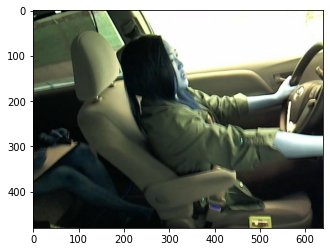

In [26]:
import matplotlib.pyplot as plt

testing_image = np.array(testing_data[5][1]).reshape(-1,240,240,1)
preds = model.predict(testing_image)
class_id = np.argmax(preds[0])
class_output = model.output[:, class_id]
path = '../input/state-farm-distracted-driver-detection/imgs/test'+'/'+testing_data[5][0]
img_array = cv2.imread(path)
plt.imshow(img_array)
print(' class '+str(class_id)+' --> '+class_dict['habits'][class_id])


In [27]:
testing_image.shape

(1, 240, 240, 1)

 class 2 --> talking on the phone - right


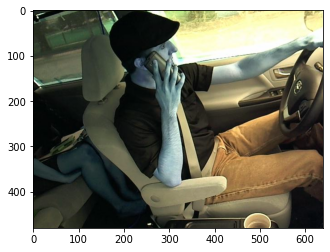

In [28]:
import matplotlib.pyplot as plt

testing_image = np.array(testing_data[1101][1]).reshape(-1,240,240,1)
preds = model.predict(testing_image)
class_id = np.argmax(preds[0])
class_output = model.output[:, class_id]
path = '../input/state-farm-distracted-driver-detection/imgs/test'+'/'+testing_data[1101][0]
img_array = cv2.imread(path)
plt.imshow(img_array)
print(' class '+str(class_id)+' --> '+class_dict['habits'][class_id])

 class 3 --> texting - left


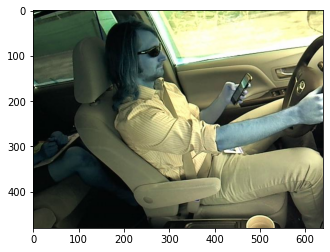

In [30]:
import matplotlib.pyplot as plt

testing_image = np.array(testing_data[406][1]).reshape(-1,240,240,1)
preds = model.predict(testing_image)
class_id = np.argmax(preds[0])
class_output = model.output[:, class_id]
path = '../input/state-farm-distracted-driver-detection/imgs/test'+'/'+testing_data[406][0]
img_array = cv2.imread(path)
plt.imshow(img_array)
print(' class '+str(class_id)+' --> '+class_dict['habits'][class_id])